# Import Library

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

/home/ketan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ketan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ketan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ketan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

# Import Dataset

In [2]:
(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.mnist.load_data()

# Visualize Dataset

In [3]:
print("Trainining features shape:", train_features.shape)
print("Training label shape:", train_labels.shape)
print("testing feature shape:", test_features.shape)
print("testing label shape:", test_labels.shape)

Trainining features shape: (60000, 28, 28)
Training label shape: (60000,)
testing feature shape: (10000, 28, 28)
testing label shape: (10000,)


In [4]:
print("Trainining features data type:", type(train_features))
print("Training label data type:", type(train_labels))
print("testing feature data type:", type(test_features))
print("testing label data type:", type(test_labels))

Trainining features data type: <class 'numpy.ndarray'>
Training label data type: <class 'numpy.ndarray'>
testing feature data type: <class 'numpy.ndarray'>
testing label data type: <class 'numpy.ndarray'>


In [5]:
example = train_features[10, :, :]
print("all unique values",np.unique(example),
      "\n Minimum value",np.min(example),
      "\n Maximum Value",np.max(example)
     )

all unique values [  0   1   6   7   8  11  18  19  24  25  28  31  34  36  40  41  42  50
  51  57  63  66  70  73  81  84  89  90  91  93 103 104 105 110 112 116
 117 118 128 137 138 139 140 141 146 164 165 166 171 177 180 197 206 207
 209 210 213 214 215 219 222 224 232 236 238 239 240 241 242 244 246 247
 250 253 254] 
 Minimum value 0 
 Maximum Value 254


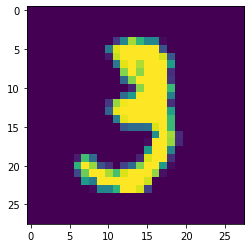

In [6]:
plt.imshow(example)

# Normalization

In [7]:
train_features = train_features/255.0
test_features = test_features/255.0

In [8]:
example = train_features[10, :, :]
print("\n Minimum value",np.min(example),
      "\n Maximum Value",np.max(example)
     )


 Minimum value 0.0 
 Maximum Value 0.996078431372549


# One-Hot Encoding

In [9]:
print("Array before One-Hot encoding\n", train_labels[:10])

Array before One-Hot encoding
 [5 0 4 1 9 2 1 3 1 4]


In [10]:
train_labels = np.eye(10)[train_labels]
test_labels = np.eye(10)[test_labels]

In [11]:
print("Array after One-Hot encoding\n",train_labels[:10])

Array after One-Hot encoding
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [12]:
train_labels.shape

(60000, 10)

# Observations

The training and testing data contain 60,000 and 10,000 images respectively and are stored in numpy.ndarray format of 1 batch each of 60,000 and 10,000 respectively. Each image is of size 28X28 and the pixel value varies from 0 to 255 for each image.

The Label corresponding to each image is an Integer value ranging from 0 to 9. This data is also stored in numpy.ndarray of same batch sizes as their counterparts.

So, before feeding them to our Neural Network we need to normalize the pixel value. We also have to One-Hot encode the output values

# Creating A Neural Network

In [13]:
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
             )

In [15]:
history = model.fit(train_features, train_labels, epochs = 10, validation_data = (test_features, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.2574 - acc: 0.9263 - val_loss: 0.1347 - val_acc: 0.9610
Epoch 2/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.1132 - acc: 0.9668 - val_loss: 0.0998 - val_acc: 0.9682
Epoch 3/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0775 - acc: 0.9769 - val_loss: 0.0831 - val_acc: 0.9740
Epoch 4/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0589 - acc: 0.9818 - val_loss: 0.0751 - val_acc: 0.9765
Epoch 5/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0456 - acc: 0.9862 - val_loss: 0.0789 - val_acc: 0.9754
Epoch 6/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0355 - acc: 0.9892 - val_loss: 0.0829 - val_acc: 0.9746
Epoch 7/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0288 - acc: 0.9911 - val_l

# Accuracy and Loss graphs

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

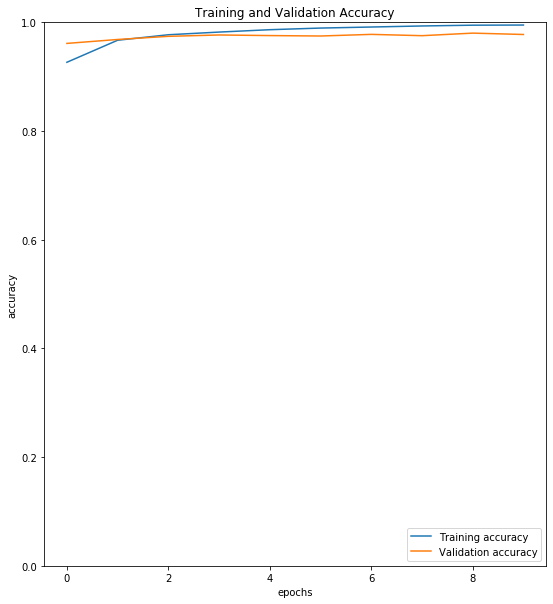

In [17]:
plt.figure(figsize = (9,10))
plt.plot(acc, label = "Training accuracy")
plt.plot(val_acc, label = "Validation accuracy")
plt.legend(loc = "lower right")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training and Validation Accuracy")
plt.ylim([0,1])
plt.savefig("./Results/NN_Training_Validation_accuracy.png")
plt.show()

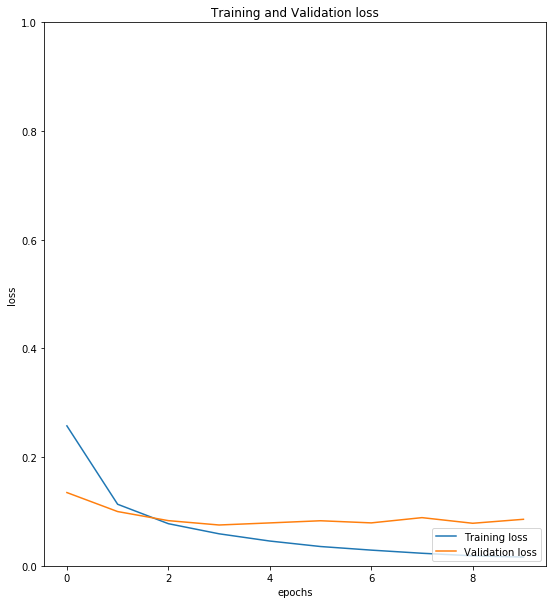

In [18]:
plt.figure(figsize = (9,10))
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label = "Validation loss")
plt.legend(loc = "lower right")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training and Validation loss")
plt.ylim([0,1])
plt.savefig("./Results/NN_Training_Validation_Loss.png")
plt.show()